(array([4.026e+03, 6.950e+02, 6.580e+02, 1.860e+02, 8.300e+01, 4.300e+01,
        2.800e+01, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([   436.72037105,  16590.19480005,  32743.66922904,  48897.14365804,
         65050.61808704,  81204.09251604,  97357.56694503, 113511.04137403,
        129664.51580303, 145817.99023202, 161971.46466102]),
 <BarContainer object of 10 artists>)

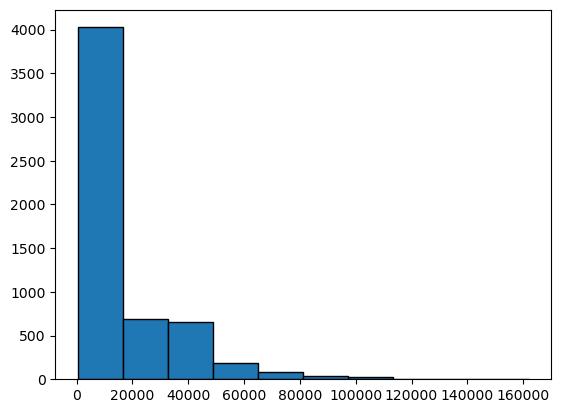

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



gdp_df = pd.read_csv("../data/UNdata_Export_20230915_015125007.csv")

gdp_df.head(20)

gdp_df.drop(columns="Value Footnotes")


renamed = gdp_df.rename(columns={gdp_df.columns[0]:'Country',gdp_df.columns[1]: 'Year', gdp_df.columns[2]: 'GDP_Per_Capita'})

num_columns = gdp_df.shape[1]
num_columns

num_rows = gdp_df.shape[0]
num_rows

column_types = gdp_df.dtypes
column_types


renamed = gdp_df.rename(columns={gdp_df.columns[0]:'Country',gdp_df.columns[1]: 'Year', gdp_df.columns[2]: 'GDP_Per_Capita'})

renamed.dtypes

diff_years = renamed['Year'].unique()

count_per_year = renamed['Year'].value_counts()
count_per_year

diff_countries = renamed['Country'].unique()
diff_countries

num_diff_countries = renamed['Country'].nunique()
num_diff_countries

frequency_countries = renamed['Country'].value_counts()
least_frequent_countries = frequency_countries.tail(10)
least_frequent_countries

gdp_2014 = renamed[renamed['Year'] <= 2014]
gdp_2014

summary_stats = gdp_2014.describe()


gdp_2014 = gdp_2014.drop(columns='Value Footnotes')

gdp_2014.head(10)

gdp_only_2014 = gdp_2014[gdp_2014['Year'] == 2014]
gdp_only_2014

plt.hist(gdp_2014['GDP_Per_Capita'], bins=10, edgecolor='k')